In [1]:
"""
    Author : Teaching Assistants of LELEC210X - UCLouvain
    Date : 21/11/2023

    Code description :
    __________________
    Check consistency between FFT of audiosignal performed on Python with 
    the implementation proposed by CMSIS/DSP in C.

"""
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal
from shutil import copyfile
import sounddevice as sd
from scipy.signal import kaiserord, lfilter, firwin
import librosa # For audio signal computations as MFCC

from classification.datasets import Dataset

## 1) Toy example : $x[n] = \cos(2 \pi 2 n/32) + \cos(2 \pi 5 n/32) $
which gives $X[k] = \delta [k-2] + \delta [k-5]$

In [2]:
tmp=[  -0.002930, \
 -0.000977, \
 7.998047, \
 -0.000977, \
 -0.000977, \
 7.999023, \
 -0.000977, \
 -0.000977, \
 0.000000, \
 -0.000977, \
 -0.000977, \
 -0.000977, \
 -0.000977, \
 -0.000977, \
 0.000000, \
 -0.000977]

In [3]:
tmp_im = [ 0.000000, \
 0.000000, \
 0.000000, \
 0.000000, \
 0.000000, \
 -0.000977, \
 0.000000, \
 0.000000, \
 0.000000, \
 0.000000, \
 0.000000, \
 -0.000977, \
 0.000000, \
 0.000000, \
 0.000000, \
 0.000000]

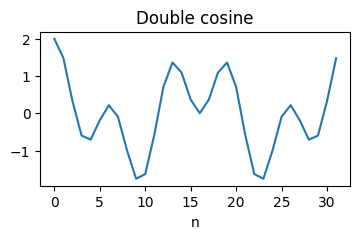

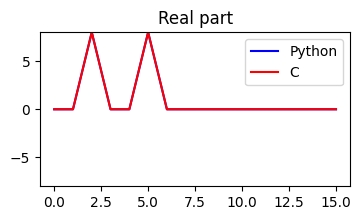

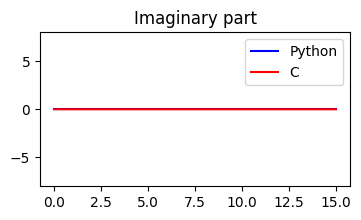

In [4]:
"audio toy example"
L2=32
audio2 = np.cos(2*np.pi*2*np.arange(L2)/L2) + np.cos(2*np.pi*5*np.arange(L2)/L2)

plt.figure(figsize=(4,2))
plt.plot(audio2)
plt.title("Double cosine")
plt.xlabel('n')
plt.show()

"FFT computation"
test = np.fft.fft(audio2/np.max(np.abs(audio2)))
# for i,elem in enumerate(test[:10]):
#     print("real[{}] = {}, imag[{}] = {}".format(i, np.real(elem), i, np.imag(elem)))

# tmp = [elem for elem in tmp] # Eventually correct factor 2 error.

plt.figure(figsize=(4,2))
plt.ylim([-8,8])
plt.title('Real part')
plt.plot(np.real(test[:16]), 'b', label='Python')
plt.plot(tmp[:16], 'r', label='C')
plt.legend()
plt.show()

plt.figure(figsize=(4,2))
plt.ylim([-8,8])
plt.title('Imaginary part')
plt.plot(np.imag(test[:16]), 'b', label='Python')
plt.plot(tmp_im[:16], 'r', label='C')
plt.legend()
plt.show()

## Real audio signal test

In [5]:
dataset = Dataset()
classnames = dataset.list_classes()

print("\n".join(classnames))

birds
chainsaw
fire
handsaw
helicopter


### Low-Pass Filter (LPF) with $f_c = 5kHz$ then downsample the signal to $f_{s2} = \frac{f_s}{4} = 11025 Hz $ 

Playing and showing data for :  C:\Users\leblanco.OASIS\Documents\IngeCivilPHD\teaching\LELEC2103\LELEC210X-private\classification\src\classification\datasets\soundfiles\birds_1.wav


Text(0.5, 1.0, 'Temporal signal')

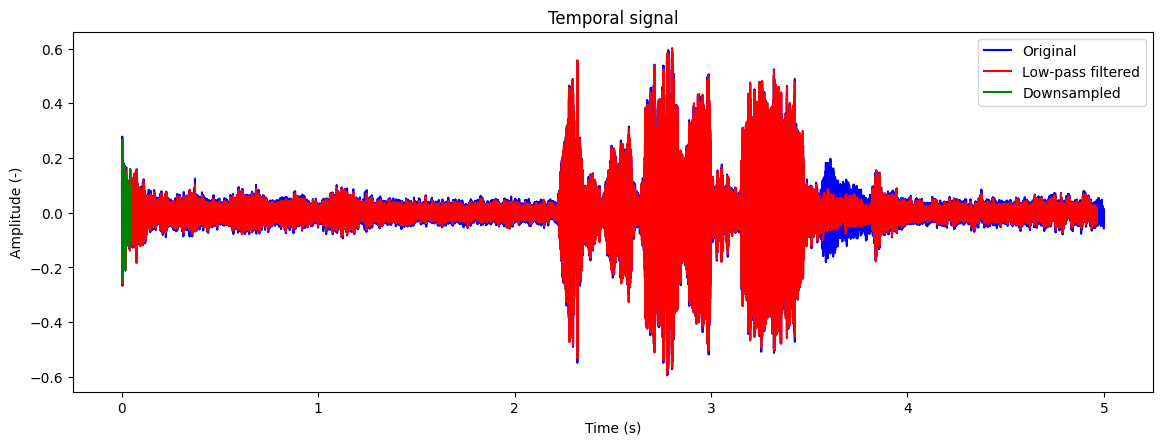

In [6]:
"Target sampling frequency"
fs2 = 11025

sound = dataset["birds", 1]
print('Playing and showing data for : ', sound)
audio, fs = sf.read(sound)

" LPF "
# The Nyquist rate of the signal.
nyq_rate = fs / 2.0
# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 50.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
cutoff_hz = 5000.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
filtered_x = lfilter(taps, 1.0, audio)
filtered_x = filtered_x[(N-1)//2:]

audio2 = signal.resample(audio, len(audio)*fs2//fs)
L = len(audio)
L2 = len(audio2)
"/!\/!\ Cut signal"
audio2 = audio2[:512]
# audio2 = audio2[:32]
L2 = len(audio2)

"Play audio"
sd.play(audio2, fs2)

"Plots"
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_axes([0.0, 0.0, 0.9, 0.9])

ax1.plot(np.arange(L)/fs, audio, 'b', label='Original')
ax1.plot(np.arange(len(filtered_x))/fs, filtered_x, 'r', label='Low-pass filtered')
ax1.plot(np.arange(L2)/fs2, audio2, 'g', label='Downsampled')
ax1.legend()
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude (-)")
ax1.set_title('Temporal signal')

# Copy paste rfft output from Putty terminal as "tmp=\[paste\]" without forgetting to remove ",\" for the last element

In [7]:
tmp=[ 3.046875, \
 -3.265625, \
 2.125000, \
 4.671875, \
 -11.359375, \
 7.421875, \
 0.375000, \
 -3.109375, \
 2.796875, \
 -3.031250, \
 3.656250, \
 -1.296875, \
 0.781250, \
 -0.921875, \
 0.593750, \
 -1.218750, \
 -1.250000, \
 2.531250, \
 -1.609375, \
 -2.859375, \
 4.296875, \
 -2.015625, \
 -1.390625, \
 -3.484375, \
 3.281250, \
 2.843750, \
 -4.921875, \
 4.125000, \
 -6.218750, \
 4.359375, \
 -0.468750, \
 2.250000, \
 -4.484375, \
 3.640625, \
 -2.500000, \
 1.859375, \
 -0.812500, \
 1.812500, \
 -1.906250, \
 0.625000, \
 0.453125, \
 -0.343750, \
 -2.390625, \
 2.500000, \
 -1.687500, \
 1.171875, \
 -1.296875, \
 1.265625, \
 -0.750000, \
 1.000000, \
 -1.359375, \
 0.656250, \
 -0.109375, \
 0.515625, \
 -2.578125, \
 3.031250, \
 -4.218750, \
 4.640625, \
 -2.453125, \
 2.031250, \
 0.296875, \
 -1.578125, \
 -0.484375, \
 1.640625, \
 -2.953125, \
 3.046875, \
 -3.953125, \
 3.546875, \
 -0.750000, \
 3.421875, \
 -6.109375, \
 4.890625, \
 0.625000, \
 -2.578125, \
 0.500000, \
 2.375000, \
 0.328125, \
 -4.859375, \
 6.156250, \
 -1.937500, \
 0.843750, \
 -0.687500, \
 0.187500, \
 -0.140625, \
 -1.968750, \
 2.281250, \
 -4.718750, \
 3.421875, \
 -2.156250, \
 1.296875, \
 -1.375000, \
 1.187500, \
 1.421875, \
 -1.687500, \
 -0.312500, \
 -0.281250, \
 -0.500000, \
 1.625000, \
 -1.625000, \
 0.921875, \
 1.234375, \
 -1.578125, \
 1.031250, \
 -0.031250, \
 -1.187500, \
 0.281250, \
 -0.359375, \
 -1.781250, \
 2.390625, \
 0.359375, \
 -1.750000, \
 1.031250, \
 0.109375, \
 -1.093750, \
 0.500000, \
 -0.500000, \
 -1.171875, \
 1.171875, \
 -0.828125, \
 1.984375, \
 -0.484375, \
 -0.656250, \
 -0.468750, \
 -0.109375, \
 1.390625, \
 -0.265625, \
 0.546875, \
 -0.078125, \
 -0.390625, \
 -0.609375, \
 1.093750, \
 -0.890625, \
 1.328125, \
 0.250000, \
 0.359375, \
 -0.875000, \
 -1.468750, \
 1.125000, \
 -0.296875, \
 -1.312500, \
 1.218750, \
 0.906250, \
 -0.265625, \
 0.343750, \
 0.156250, \
 -1.031250, \
 -0.109375, \
 0.171875, \
 -0.562500, \
 0.984375, \
 0.234375, \
 2.125000, \
 -4.296875, \
 2.812500, \
 0.859375, \
 -1.671875, \
 0.203125, \
 1.734375, \
 -4.625000, \
 1.890625, \
 0.343750, \
 0.656250, \
 -0.906250, \
 0.218750, \
 0.625000, \
 -1.687500, \
 -0.203125, \
 0.703125, \
 -0.250000, \
 0.015625, \
 -0.734375, \
 2.406250, \
 -0.375000, \
 -2.734375, \
 0.234375, \
 1.390625, \
 -0.468750, \
 1.875000, \
 -5.062500, \
 3.375000, \
 2.015625, \
 -2.843750, \
 0.546875, \
 2.390625, \
 -0.203125, \
 -0.875000, \
 -0.203125, \
 0.578125, \
 -1.171875, \
 0.921875, \
 0.468750, \
 -0.468750, \
 0.453125, \
 -0.031250, \
 -0.093750, \
 1.078125, \
 -1.312500, \
 -0.250000, \
 0.171875, \
 0.265625, \
 0.328125, \
 -0.250000, \
 -0.046875, \
 0.281250, \
 -0.390625, \
 -0.031250, \
 -0.078125, \
 0.234375, \
 0.203125, \
 0.421875, \
 -1.171875, \
 0.765625, \
 0.437500, \
 0.093750, \
 -0.390625, \
 0.046875, \
 -0.109375, \
 0.359375, \
 -0.109375, \
 0.062500, \
 -1.046875, \
 1.328125, \
 0.531250, \
 -0.531250, \
 -0.281250, \
 -0.046875, \
 -0.578125, \
 1.062500, \
 -1.718750, \
 0.859375, \
 0.062500, \
 -0.187500, \
 0.687500, \
 -0.875000, \
 -0.031250, \
 0.453125, \
 0.281250, \
 -0.281250, \
 0.375000, \
 0.312500, \
 -0.437500, \
 -0.937500, \
 1.234375, \
 -0.968750, \
 0.562500, \
 0.281250, \
 0.093750, \
 -0.296875, \
 -0.421875, \
 0.250000, \
 0.515625, \
 0.453125, \
 -1.187500, \
 -0.140625, \
 0.484375, \
 26.234375]

## Now make comparison

real[0] = 3.1094055664689186, imag[0] = 0.0
real[1] = -3.234520218532518, imag[1] = -3.138355424902877
real[2] = 2.159821255807543, imag[2] = -0.08640689063232826
real[3] = 4.707110255992923, imag[3] = 2.7324591008330192
real[4] = -11.337434903335186, imag[4] = 0.4210661856369893
real[5] = 7.45672371164769, imag[5] = -3.402534309883552
real[6] = 0.40241269785461276, imag[6] = 1.728727994180903
real[7] = -3.0754242013509794, imag[7] = 0.8621551165199424
real[8] = 2.825836171584261, imag[8] = -1.912945703837105
real[9] = -3.000925442026953, imag[9] = 0.24784900439829793


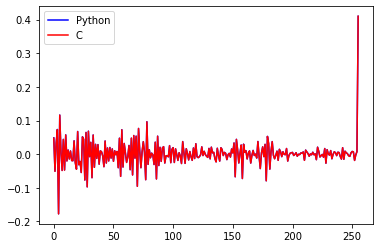

In [9]:
test = np.fft.fft(np.hamming(len(audio2))*audio2/np.max(np.abs(audio2)))
# test = np.fft.fftshift(test)
for i,elem in enumerate(test[:10]):
    print("real[{}] = {}, imag[{}] = {}".format(i, np.real(elem), i, np.imag(elem)))

test[256]=0

# tmp = [elem for elem in tmp] # Eventually correct factor 2 error.

plt.figure()
plt.plot(np.real(test[:256])/(2**6), 'b', label='Python')
plt.plot(np.array(tmp)[:256]/(2**6), 'r', label='C')
plt.legend()
plt.show()

In [8]:
tmp=[ 3.031250, \
 4.500000, \
 2.093750, \
 5.375000, \
 11.343750, \
 8.156250, \
 1.718750, \
 3.187500, \
 3.375000, \
 3.031250, \
 3.656250, \
 2.218750, \
 1.968750, \
 4.593750, \
 4.218750, \
 2.468750, \
 1.937500, \
 6.937500, \
 8.781250, \
 4.187500, \
 4.468750, \
 2.156250, \
 5.250000, \
 10.781250, \
 6.312500, \
 4.468750, \
 6.875000, \
 5.906250, \
 6.968750, \
 6.531250, \
 2.656250, \
 2.562500, \
 4.812500, \
 3.906250, \
 2.750000, \
 3.281250, \
 1.875000, \
 1.781250, \
 1.937500, \
 0.812500, \
 0.406250, \
 1.250000, \
 2.562500, \
 2.468750, \
 1.875000, \
 1.375000, \
 1.281250, \
 1.281250, \
 0.750000, \
 1.187500, \
 1.406250, \
 0.687500, \
 1.093750, \
 2.156250, \
 3.062500, \
 3.031250, \
 4.218750, \
 5.093750, \
 2.843750, \
 2.125000, \
 0.687500, \
 1.531250, \
 1.875000, \
 3.625000, \
 3.656250, \
 3.250000, \
 4.000000, \
 3.531250, \
 4.093750, \
 7.843750, \
 7.437500, \
 5.062500, \
 3.437500, \
 2.718750, \
 1.437500, \
 2.656250, \
 6.531250, \
 7.531250, \
 6.218750, \
 1.937500, \
 3.031250, \
 2.843750, \
 3.812500, \
 1.625000, \
 2.156250, \
 2.281250, \
 4.812500, \
 4.406250, \
 2.593750, \
 1.375000, \
 1.375000, \
 2.125000, \
 3.000000, \
 1.937500, \
 1.343750, \
 1.500000, \
 0.500000, \
 1.593750, \
 1.750000, \
 1.781250, \
 1.218750, \
 3.625000, \
 3.343750, \
 2.343750, \
 1.343750, \
 0.406250, \
 0.406250, \
 2.468750, \
 2.375000, \
 0.625000, \
 1.875000, \
 1.656250, \
 1.500000, \
 1.437500, \
 0.687500, \
 0.500000, \
 1.406250, \
 1.156250, \
 1.343750, \
 1.968750, \
 1.187500, \
 0.625000, \
 0.500000, \
 1.687500, \
 1.562500, \
 0.406250, \
 0.843750, \
 0.281250, \
 0.843750, \
 0.812500, \
 1.375000, \
 0.937500, \
 1.531250, \
 1.062500, \
 0.406250, \
 2.031250, \
 2.750000, \
 1.375000, \
 0.281250, \
 1.312500, \
 2.000000, \
 1.218750, \
 0.000000, \
 0.406250, \
 0.281250, \
 1.156250, \
 0.750000, \
 0.000000, \
 0.812500, \
 0.937500, \
 1.937500, \
 4.687500, \
 4.468750, \
 3.875000, \
 3.000000, \
 1.656250, \
 1.562500, \
 3.593750, \
 4.625000, \
 3.781250, \
 0.843750, \
 1.218750, \
 0.937500, \
 0.750000, \
 2.000000, \
 1.875000, \
 0.406250, \
 1.406250, \
 1.250000, \
 0.000000, \
 1.375000, \
 2.406250, \
 2.312500, \
 2.750000, \
 3.687500, \
 1.937500, \
 0.750000, \
 2.250000, \
 5.125000, \
 7.375000, \
 5.531250, \
 2.843750, \
 2.062500, \
 2.406250, \
 2.031250, \
 0.843750, \
 0.687500, \
 0.906250, \
 1.281250, \
 1.250000, \
 0.687500, \
 0.625000, \
 0.812500, \
 0.812500, \
 0.562500, \
 1.156250, \
 1.656250, \
 0.937500, \
 0.000000, \
 0.000000, \
 0.281250, \
 0.406250, \
 0.406250, \
 0.406250, \
 0.281250, \
 0.281250, \
 0.000000, \
 0.625000, \
 0.562500, \
 0.406250, \
 1.156250, \
 1.062500, \
 0.406250, \
 0.625000, \
 0.406250, \
 0.562500, \
 1.187500, \
 1.187500, \
 0.281250, \
 0.000000, \
 1.031250, \
 1.500000, \
 1.031250, \
 0.687500, \
 0.281250, \
 0.000000, \
 0.562500, \
 1.062500, \
 1.687500, \
 0.937500, \
 0.000000, \
 0.406250, \
 0.687500, \
 1.187500, \
 1.156250, \
 0.406250, \
 0.281250, \
 0.500000, \
 0.625000, \
 0.937500, \
 0.406250, \
 0.906250, \
 1.437500, \
 1.031250, \
 0.562500, \
 1.250000, \
 1.781250, \
 0.281250, \
 0.750000, \
 0.000000, \
 0.500000, \
 1.031250, \
 1.156250, \
 0.281250, \
 0.625000, \
 26.250000, \
 9.468750, \
 26.250000, \
 0.625000, \
 0.281250, \
 1.156250, \
 1.031250, \
 0.500000, \
 0.000000, \
 0.750000, \
 0.281250, \
 1.781250, \
 1.250000, \
 0.562500, \
 1.031250, \
 1.437500, \
 0.906250, \
 0.406250, \
 0.937500, \
 0.625000, \
 0.500000, \
 0.281250, \
 0.406250, \
 1.156250, \
 1.187500, \
 0.687500, \
 0.406250, \
 0.000000, \
 0.937500, \
 1.687500, \
 1.062500, \
 0.562500, \
 0.000000, \
 0.281250, \
 0.687500, \
 1.031250, \
 1.500000, \
 1.031250, \
 0.000000, \
 0.281250, \
 1.187500, \
 1.187500, \
 0.562500, \
 0.406250, \
 0.625000, \
 0.406250, \
 1.062500, \
 1.156250, \
 0.406250, \
 0.562500, \
 0.625000, \
 0.000000, \
 0.281250, \
 0.281250, \
 0.406250, \
 0.406250, \
 0.406250, \
 0.281250, \
 0.000000, \
 0.000000, \
 0.937500, \
 1.656250, \
 1.156250, \
 0.562500, \
 0.812500, \
 0.812500, \
 0.625000, \
 0.687500, \
 1.250000, \
 1.281250, \
 0.906250, \
 0.687500, \
 0.843750, \
 2.031250, \
 2.406250, \
 2.062500, \
 2.843750, \
 5.531250, \
 7.375000, \
 5.125000, \
 2.250000, \
 0.750000, \
 1.937500, \
 3.687500, \
 2.750000, \
 2.312500, \
 2.406250, \
 1.375000, \
 0.000000, \
 1.250000, \
 1.406250, \
 0.406250, \
 1.875000, \
 2.000000, \
 0.750000, \
 0.937500, \
 1.218750, \
 0.843750, \
 3.781250, \
 4.625000, \
 3.593750, \
 1.562500, \
 1.656250, \
 3.000000, \
 3.875000, \
 4.468750, \
 4.687500, \
 1.937500, \
 0.937500, \
 0.812500, \
 0.000000, \
 0.750000, \
 1.156250, \
 0.281250, \
 0.406250, \
 0.000000, \
 1.218750, \
 2.000000, \
 1.312500, \
 0.281250, \
 1.375000, \
 2.750000, \
 2.031250, \
 0.406250, \
 1.062500, \
 1.531250, \
 0.937500, \
 1.375000, \
 0.812500, \
 0.843750, \
 0.281250, \
 0.843750, \
 0.406250, \
 1.562500, \
 1.687500, \
 0.500000, \
 0.625000, \
 1.187500, \
 1.968750, \
 1.343750, \
 1.156250, \
 1.406250, \
 0.500000, \
 0.687500, \
 1.437500, \
 1.500000, \
 1.656250, \
 1.875000, \
 0.625000, \
 2.375000, \
 2.468750, \
 0.406250, \
 0.406250, \
 1.343750, \
 2.343750, \
 3.343750, \
 3.625000, \
 1.218750, \
 1.781250, \
 1.750000, \
 1.593750, \
 0.500000, \
 1.500000, \
 1.343750, \
 1.937500, \
 3.000000, \
 2.125000, \
 1.375000, \
 1.375000, \
 2.593750, \
 4.406250, \
 4.812500, \
 2.281250, \
 2.156250, \
 1.625000, \
 3.812500, \
 2.843750, \
 3.031250, \
 1.937500, \
 6.218750, \
 7.531250, \
 6.531250, \
 2.656250, \
 1.437500, \
 2.718750, \
 3.437500, \
 5.062500, \
 7.437500, \
 7.843750, \
 4.093750, \
 3.531250, \
 4.000000, \
 3.250000, \
 3.656250, \
 3.625000, \
 1.875000, \
 1.531250, \
 0.687500, \
 2.125000, \
 2.843750, \
 5.093750, \
 4.218750, \
 3.031250, \
 3.062500, \
 2.156250, \
 1.093750, \
 0.687500, \
 1.406250, \
 1.187500, \
 0.750000, \
 1.281250, \
 1.281250, \
 1.375000, \
 1.875000, \
 2.468750, \
 2.562500, \
 1.250000, \
 0.406250, \
 0.812500, \
 1.937500, \
 1.781250, \
 1.875000, \
 3.281250, \
 2.750000, \
 3.906250, \
 4.812500, \
 2.562500, \
 2.656250, \
 6.531250, \
 6.968750, \
 5.906250, \
 6.875000, \
 4.468750, \
 6.312500, \
 10.781250, \
 5.250000, \
 2.156250, \
 4.468750, \
 4.187500, \
 8.781250, \
 6.937500, \
 1.937500, \
 2.468750, \
 4.218750, \
 4.593750, \
 1.968750, \
 2.218750, \
 3.656250, \
 3.031250, \
 3.375000, \
 3.187500, \
 1.718750, \
 8.156250, \
 11.343750, \
 5.375000, \
 2.093750, \
 4.500000]

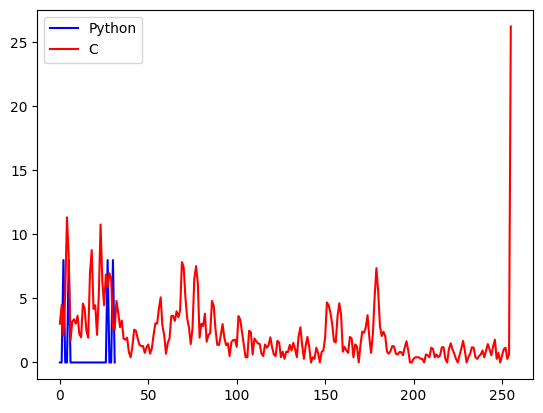

In [9]:
plt.figure()
plt.plot(np.abs(test[:256]), 'b', label='Python')
plt.plot(np.array(tmp)[:256], 'r', label='C')

plt.legend()
plt.show()